#Step 1: Enabling GPU within your notebook

Colab -> Change Runtime Type -> GPU -> Save

In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 2.72 s (started: 2022-10-31 22:29:49 +00:00)


In [ ]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.08 ms (started: 2022-10-31 22:29:55 +00:00)


#Step 2: Connect to your google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.03 s (started: 2022-10-31 22:29:57 +00:00)


In [ ]:
# to remove folders
#!rm -rf /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj

#Step 3: Cloning and Building Darknet

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo

/content/drive/MyDrive/Colab_Notebooks/Yolo
time: 2.91 ms (started: 2022-10-31 22:30:00 +00:00)


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.
time: 112 ms (started: 2022-10-30 23:55:28 +00:00)


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
time: 343 ms (started: 2022-10-31 22:30:03 +00:00)


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
time: 118 ms (started: 2022-10-31 22:30:05 +00:00)


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1150:10: note: ...thi

# Step 4: Placing our custom wildfire dataset in Obj folder and placing obj.data and obj.names in Data folder


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data
%mkdir obj/
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data
mkdir: cannot create directory ‘obj/’: File exists
/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj
time: 121 ms (started: 2022-10-31 22:31:51 +00:00)


In [ ]:
#downloading test images from Roboflow
#export dataset above with format yolo darknet
#code in yolo darknet format exported from Roboflow

!curl -L "https://app.roboflow.com/ds/ztDqWOrsET?key=kuQ8G7l2eY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/ETN_snapshot-2009-07-03_jpg.rf.e8eff6431453696e9cd85f19cc867139.txt  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.40003f6f68b509a00eaba5190d2d1d48.jpg  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.40003f6f68b509a00eaba5190d2d1d48.txt  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.98bb5fd86a798fbf495e050de78cea32.jpg  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.98bb5fd86a798fbf495e050de78cea32.txt  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.de0352842e94954c8b20a8946026bc9e.jpg  
 extracting: train/ETN_snapshot-2009-07-04_jpg.rf.de0352842e94954c8b20a8946026bc9e.txt  
 extracting: train/ETN_snapshot-2009-07-06_jpg.rf.87551272e3cd7d4f746aacccac1af0ef.jpg  
 extracting: train/ETN_snapshot-2009-07-06_jpg.rf.87551272e3cd7d4f746aacccac1af0ef.txt  
 extracting: train/ETN_snapshot-2009-07-06_jpg.rf.e87250a0ca2d17ea92e39e7b609e891a.jpg  
 extracting: train/ETN_snapshot-2009-07-06_jpg.rf.e87250a0c

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/

/content/drive/MyDrive/Colab_Notebooks/Yolo
time: 2.54 ms (started: 2022-10-30 23:58:41 +00:00)


In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/Yolo
time: 12.9 ms (started: 2022-10-30 23:58:43 +00:00)


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data
time: 3.3 ms (started: 2022-10-30 23:58:46 +00:00)


#Step 5: Creating Text files with path for Train and Valid images

In [ ]:
import os

image_files = []
os.chdir(os.path.join("obj", "test"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/test/" + filename)
os.chdir("..")
with open("test.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
import os

image_files = []
os.chdir(os.path.join("obj", "train"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/train/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
import os

image_files = []
os.chdir(os.path.join("obj", "valid"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/valid/" + filename)
os.chdir("..")
with open("valid.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj


In [ ]:
#copying test file
%cp -av /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test.txt /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/

'/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test.txt' -> '/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/test.txt'


In [ ]:
#copying train file
%cp -av /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/train.txt /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/

'/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/train.txt' -> '/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/train.txt'


In [ ]:
#copying valid file
%cp -av /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/valid.txt /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/

'/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/valid.txt' -> '/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/valid.txt'


#Step 6: Downloading Pre-Trained weights for Yolo

In [ ]:
# upload pretrained convolutional layer weights
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
!wget http://pjreddie.com/media/files/darknet53.conv.74

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
--2022-10-30 23:59:35--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2022-10-30 23:59:36--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  16.3MB/s    in 11s     

2022-10-30 23:59:48 (14.0 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]

time: 12.4 s (started: 2022-10-30 23:59:35 +00:00)


In [ ]:
!pwd

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
time: 112 ms (started: 2022-10-31 00:00:13 +00:00)


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
'''IMP
Move config, obj.data and obj.names files
'''

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet


'IMP\nMove config, obj.data and obj.names files\n'

time: 6.46 ms (started: 2022-10-31 22:31:51 +00:00)


#Step 7: Model Training

In [ ]:
# train your custom detector
!./darknet detector train /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
#tensorboard --logdir=log

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.766555), count: 9, class_loss = 0.765088, iou_loss = 0.372303, total_loss = 1.137391 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.744225), count: 1, class_loss = 0.005602, iou_loss = 0.031042, total_loss = 0.036645 
 total_bbox = 635617, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.894821), count: 1, class_loss = 0.000232, iou_loss = 0.009758, total_loss = 0.009990 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.783339), count: 4, class_loss = 0.228261, iou_loss = 0.159051, total_loss = 0.387312 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.746423), count: 4, class_loss = 0.151230, iou_loss = 0.141351, total_loss = 0.292580 
 total_bbox = 635626, rewritten_bbox = 0.000000 % 
v3 (m

#Step 8: Printing Model Performance and training loss

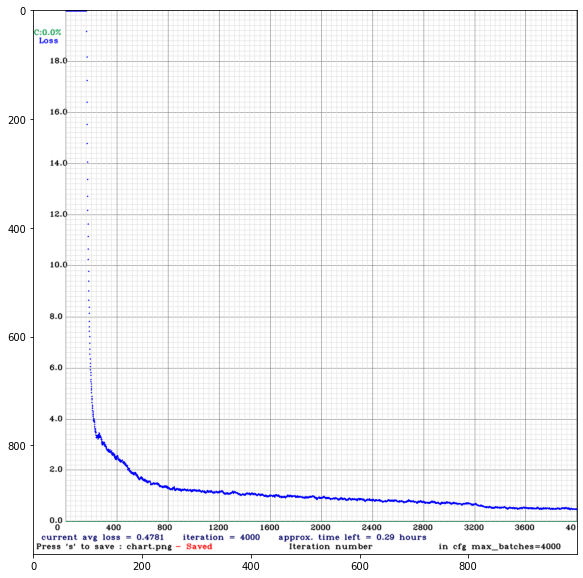

time: 401 ms (started: 2022-10-31 22:31:51 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/chart.png')
plt.figure(figsize = (12,10))
imgplot = plt.imshow(img)
plt.show()

# To use this section In case model training terminates and needs to resume

In [ ]:
# to train from saved weights.
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg backup/yolov3_custom_last.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Short

# Set our custom cfg to test mode 

In [ ]:
# need to set our custom cfg to test mode 
#comment training and uncomment test batch
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/cfg
/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
time: 929 ms (started: 2022-10-31 20:43:32 +00:00)


#Step 9: Testing Model with Test Images

#True Positive Test cases

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet

/content/drive/MyDrive/Colab_Notebooks/Yolo/darknet
time: 2.55 ms (started: 2022-10-31 22:33:40 +00:00)


 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

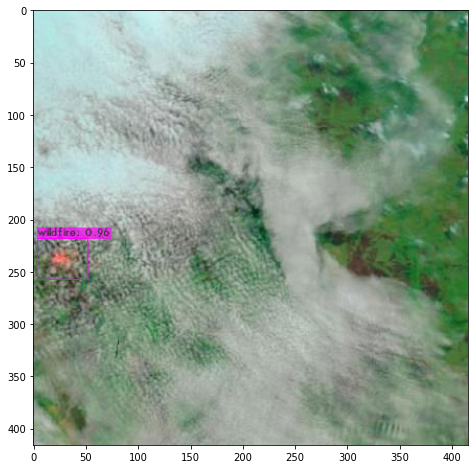

time: 6.54 s (started: 2022-10-31 23:10:29 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/snapshot-2008-07-26_jpg.rf.c06a3f6d2831b2c4e857d38120e81602.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()


 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

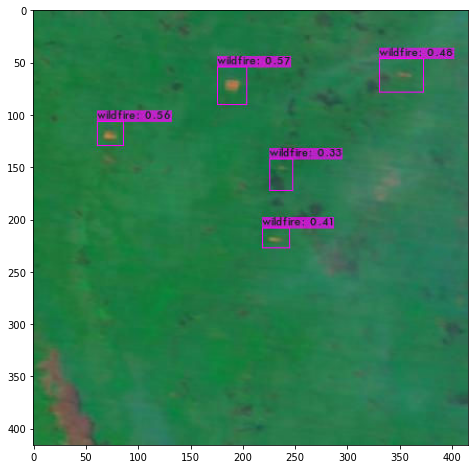

time: 6.71 s (started: 2022-10-31 23:13:25 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/snapshot-2010-06-17_974587_jpg.rf.bc7ac4764a063e88b1ea7e050139e486.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()


In [ ]:
#in obj.data change the path for valid to test fro test set and valid set evluation metrix wrt to training set.
!./darknet detector map data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights 

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

#True Negative

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

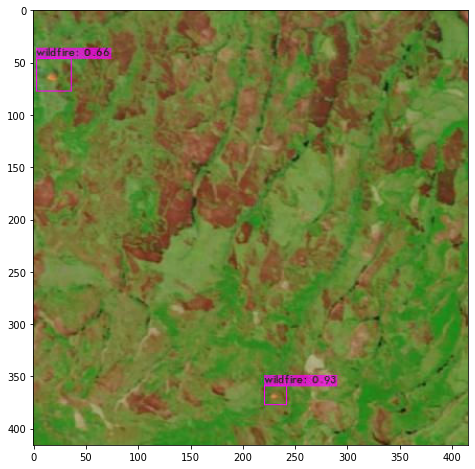

time: 6.67 s (started: 2022-10-31 23:18:31 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/11111snapshot-2017-08-15_jpg.rf.9eb982f45b665464788c3b23d24f8b91.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()



#False Positive

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

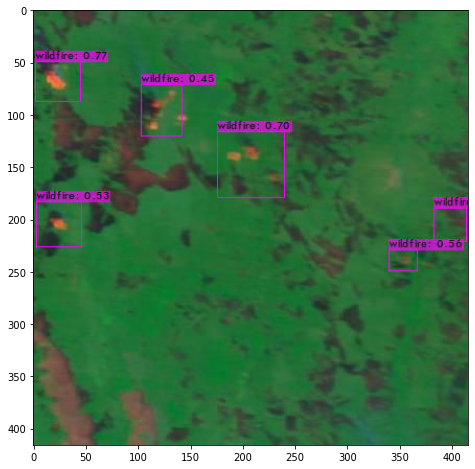

time: 6.54 s (started: 2022-10-31 23:44:15 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/snapshot-2008-06-27_jpg.rf.c365baa780dd065c41d037d1577cf1f6.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()



# Minute object Detection

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

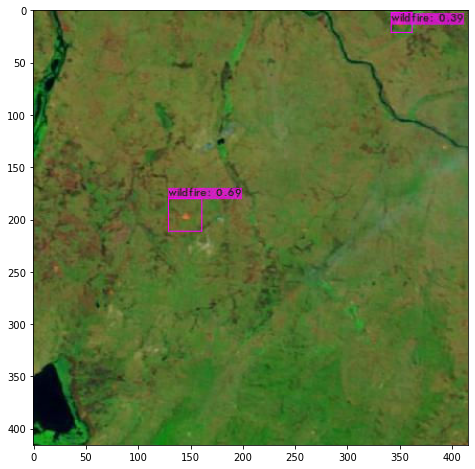

time: 6.66 s (started: 2022-10-31 23:43:02 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/33333snapshot-2020-07-22_jpg.rf.c0dd7273074e9ba6363f3efa9336565c.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()



 CUDA-version: 11020 (11020), cuDNN: 8.1.1, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  

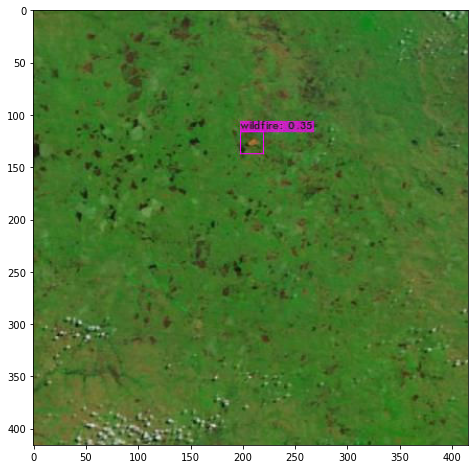

time: 6.65 s (started: 2022-10-31 23:41:46 +00:00)


In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/backup/yolov3_custom_final.weights /content/drive/MyDrive/Colab_Notebooks/Yolo/darknet/data/obj/test/44444snapshot-2017-07-23_jpg.rf.f8eda711f3ce1df9635105be25cdfd61.jpg -thresh 0.3
img = mpimg.imread('predictions.jpg')
plt.figure(figsize = (10,8))
imgplot = plt.imshow(img)
plt.show()

